## Linear Regression Problem

#### Information
Firt of all we'll upload data and giving the names columns 

In [33]:
#Upload some usefull python functions

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
## read data and load
data = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [35]:
X = data["Population"].values
Y = data["Profit"].values
theta = np.zeros((2,1)) #initial values
m=len(Y)

<function matplotlib.pyplot.show(close=None, block=None)>

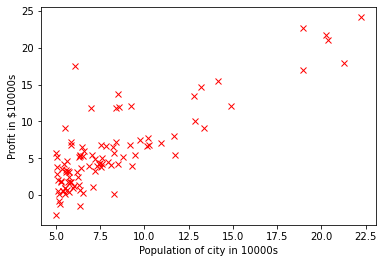

In [36]:
plt.plot(X,Y,'rx')
plt.xlabel("Population of city in 10000s")
plt.ylabel("Profit in $10000s")
plt.show
##This graph shows us how your data is distributed. 

In [37]:
X = np.append(np.ones([m,1]), X.reshape(m,1),axis = 1) #Adding ones to vector X and reshape

Y = Y.reshape(m,1)

theta = np.zeros([2,1])

In [38]:
def costComputation(X,Y,theta):
    """Compute cost for linear regression"""
    import numpy as np
    
    m = len(Y)
    
    
    pred = X.dot(theta) #Prediction of hypothesis on all m examples
    
    #error = np.square(np.subtract(Y, pred)) #Calculation off error--- (Hyptothesis-y)^2
    
    #J = 1/(2*m)*error.sum()
    J = 1/(2*m)*(np.sum((pred-Y)**2))
    return J

          

In [39]:
cost = costComputation(X,Y,theta)
print(cost)


32.072733877455676


In [40]:
theta1= np.array([[-1],[2]])
print(costComputation(X,Y,theta1))

54.24245508201238


In [41]:
def gradientDescent(X, Y, theta, alpha, iter):
    '''
    This function takes in the training data, the intial theta values(coefficients), the learning rate, 
    and the number of iterations. The output will be the a new set of coefficeient of the linear regression (theta),
    optimized for making predictions.
    '''
    
    J_history = []## Array for storing the cost values on each iteration.
    m = len(Y)## This is the length of the training set
    
    for i in range(iter): ## Loop for 1500 iterations
        h = X.dot(theta) ## The hypothesis
        theta = theta - (alpha/m)*(X.T.dot(h-Y))   #Gradient descent function
        J_history.append(costComputation(X, Y, theta))  #Append the cost to the J_history array
    return theta, J_history     #return the final values of theta and the J_history array


iter = 1500 ## Initialize the iteration parameter.
alpha = 0.01 ## Initialize the learning rate.

## Call the function and pass in the parameters to compute new coefficient values.
new_theta, J_history = gradientDescent(X, Y, theta, alpha, iter) 

print(new_theta)

[[-3.63029144]
 [ 1.16636235]]


In [42]:
new_cost = costComputation(X,Y,new_theta)

print(new_cost)

#Calculate new cost by using new theta

4.483388256587725


Text(0.5, 1.0, 'Training Data with Linear Regression Fit')

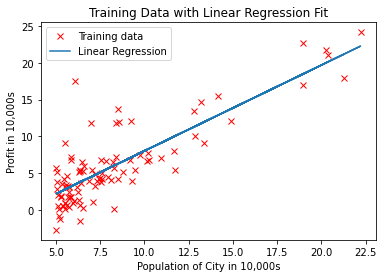

In [43]:
plt.plot(X[:,1],Y,'rx',label='Training data')
plt.plot(X[:,1].reshape([m,1]), np.dot(X, new_theta), label='Linear Regression')
plt.ylabel('Profit in 10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.title('Training Data with Linear Regression Fit')

In [44]:
def prediction(X,new_theta):
    """
    This function help us for prediction.
    """
    pred = np.dot(X,new_theta)*10000
    
    return pred

In [45]:
FirsCity = 35000
SecondCity = 70000
predict1 = (prediction(([1, 3.5]),(new_theta)))
predict2 = (prediction(([1, 7]),(new_theta)))

print(f"For population of {FirsCity} we predict a profit of",float(predict1))
print(f"For population of {SecondCity} we predict a profit of",float(predict2))

For population of 35000 we predict a profit of 4519.7678677017675
For population of 70000 we predict a profit of 45342.45012944714
